# **Gradient Descent and Types of Gradient Descent:**

**Gradient Descent:**

Gradient Descent is an optimization algorithm used to minimize the loss function in machine learning models. The idea is to iteratively adjust the parameters (weights and biases) of the model to minimize the error between the predicted output and the actual output.

# **Types of Gradient Descent**
**Batch Gradient Descent (BGD)**



*   Uses the entire dataset to compute the gradient.
*   Updates weights after computing the gradients of all data points.


*   Pros: Converges to the global minimum for convex functions.
*   Cons: Computationally expensive for large datasets.

**Stochastic Gradient Descent (SGD)**



*   Uses one data point at a time to compute the gradient.
*   Updates weights after computing the gradient of a single data point.
*   Pros: Faster convergence and can escape local minima.
*  Cons: More noisy updates can cause the objective function to fluctuate.

**Mini-Batch Gradient Descent**



*   Uses a subset of the dataset (mini-batch) to compute the gradient.
*   Updates weights after computing the gradients of the mini-batch.
*   Pros: Balance between the efficiency of BGD and the noise reduction of SGD.
*  Cons: Requires tuning of the mini-batch size.

**Validation Set & Validation Loss**

**Validation Set**

A validation set is a subset of the dataset used to evaluate the model during training. It is not used for training but helps in fine-tuning the model's hyperparameters and preventing overfitting.

**Validation Loss**

Validation loss is the error calculated on the validation set. It is used to monitor the model's performance and ensure that it generalizes well to unseen data. If the validation loss decreases, the model is improving. If it increases, the model might be overfitting.



Epoch 1/120


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 12.2332 - val_loss: 9.0234
Epoch 2/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 10.6552 - val_loss: 8.1825
Epoch 3/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.5902 - val_loss: 7.5477
Epoch 4/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.4128 - val_loss: 6.9301
Epoch 5/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.0084 - val_loss: 6.2732
Epoch 6/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.9471 - val_loss: 5.5824
Epoch 7/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.4121 - val_loss: 4.8348
Epoch 8/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.7415 - val_loss: 4.0920
Epoch 9/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.8248 - val_loss: 3.3751
Epoch 10/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.4722 - val_loss: 2.7846
Epoch 11/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.7335 - val_loss: 2.3900
Epoch 12/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.0783 - val_loss: 2.2612
Epo

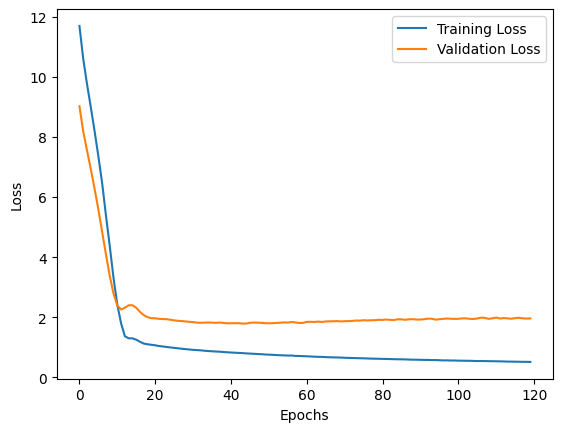

In [2]:
!pip install -q tensorflow seaborn scikit-learn

# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load Tips Data from Seaborn
tips = sns.load_dataset('tips')

# Preprocess the Data
# Convert categorical columns to dummy variables
tips = pd.get_dummies(tips, drop_first=True)

# Separate features and target
X = tips.drop('tip', axis=1)
y = tips['tip']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the MLP Model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='linear'))

# Compile the Model
model.compile(optimizer='adam', loss='mse')

# Train the Model
history = model.fit(X_train, y_train, epochs=120, validation_split=0.2, batch_size=32)

# Evaluate the Model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Visualize Training History
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
